In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [18]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [20]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)              

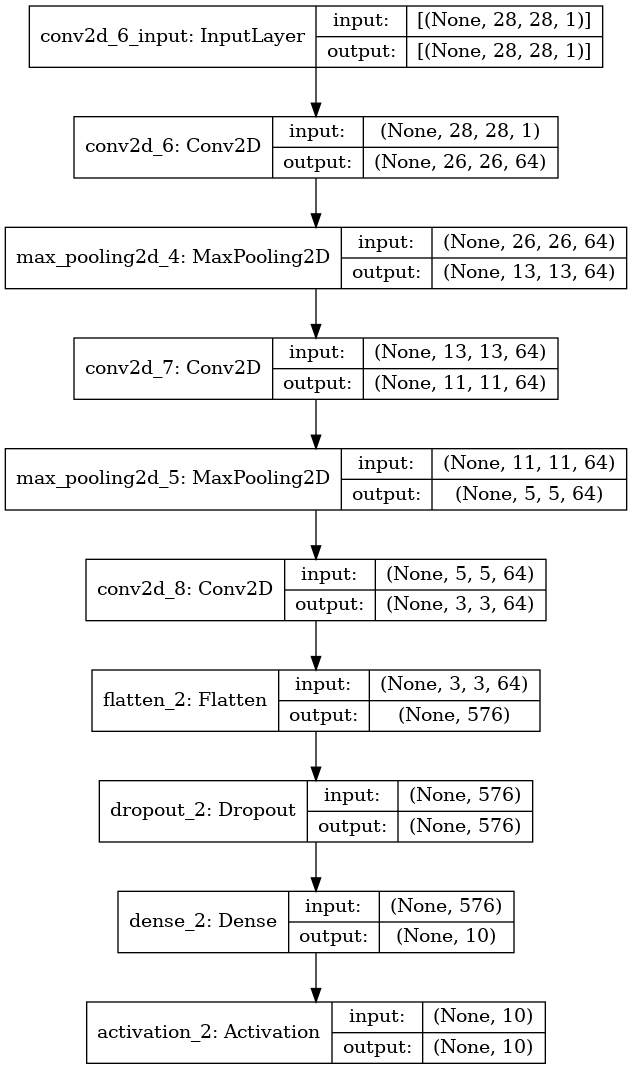

In [24]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())

# dropout added as regularizer
model.add(Dropout(dropout))

# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='./data/cnn-mnist.png', show_shapes=True)

In [25]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test, y_test,
                        batch_size=batch_size,
                        verbose=0)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2737 - accuracy: 0.9168
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0693 - accuracy: 0.9791
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0482 - accuracy: 0.9849
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0395 - accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0170 - accuracy: 0.9944